In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 24: Hypothesis Testing Errors & Power

Throughout this block, we have been studying hypothesis tests. We have covered the four basic steps of any hypothesis test, and we have practiced various methods for obtaining the distribution of our test statistic under the null hypothesis. 

After we have reached a conclusion (reject or fail to reject), we must consider possible errors. 

### Type I error 

Type I error is the event that we rejected the null hypothesis when the null hypothesis was actually true. Type I error is also known as a false positive. The probability of a Type I error is usually defined by the threshold used for rejection. A common threshold is 0.05. Those of you who have taken statistics before may recognize this value as $\alpha$. 

### Type II error

Type II error is the event that we failed to reject the null hypothesis when the null hypothesis was actually false. This is otherwise known as a false negative. The probability of a Type II error is harder to find and requires a more in-depth analysis of a hypothesis test. The probability of a Type II error is often given as $\beta$, and $1-\beta$ is referred to as **Power**. The power of a test is probability that we will reject the null hypothesis when we are supposed to. 

Which one of these errors is more serious? It depends on the context of the problem. 

### Example: Golf Balls

Joe has a summer job at a golf course and one of his jobs is to fish out golf balls from the water traps. He has a theory that certain types of golf ball are more likely to end up in the water than others. Let's assume there are four brands of golf ball, let's and assume that all four are used equally at this golf course. He fishes out 100 golf balls and counts each brand. He finds 30 of brand A, 30 of brand B, 20 of brand C and 20 of brand D. Conduct a hypothesis test to determine whether certain types of golf ball are more likely than others to end up in the water.

##### Step 1: Hypotheses

##### Hn = the majority type of golf ball found in water traps (if one exists) is simply due to chance. In general, the probability that each of the four types lands in the water trap should be equal (0.25).
##### Ha = certain types of golf balls are more likely to end up in the water than others.

Step 2: Test statistic

There are many correct answers, but let's go with sum of absolute difference between observed and expected counts under $H_0$. To do this, we need to find the expected counts. If each ball was equally likely, how many should we expected to find of each if we select 100 golf balls? 

##### 100*0.25 = 25, there should be 25 of each type according to the was equally likely to be found.
##### Therefore, the abosolute difference between observed and expected counts can be shown in the following table.

In [16]:
obs_exp_table = Table().with_columns("Type",["A","B","C","D"],"Obs q",[30,30,20,20],"Exp q",[25,25,25,25])
sum_abs_diff_Hn = sum(abs(obs_exp_table.column("Obs q")-obs_exp_table.column("Exp q")))
print("If the test statistic were true (Hn), the observed test statistic would be 0.")
print("The sum of the absolute difference between observed and expected counts under Hn is",sum_abs_diff_Hn)
obs_exp_table

If the test statistic were true (Hn), the observed test statistic would be 0.
The sum of the absolute difference between observed and expected counts under Hn is 20


Type,Obs q,Exp q
A,30,25
B,30,25
C,20,25
D,20,25


In [26]:
#Nacho's code:
ts = np.sum(abs(stats.multinomial.rvs(100,[0.25,0.25,0.25,0.25],size=10000)-25),axis=1)
ts

array([14, 16,  6, ..., 18, 14,  6])

Step 3: $p$-value

We need the distribution of the test statistic under $H_0$. 
(To find the distribution of the ts you have to . . .)

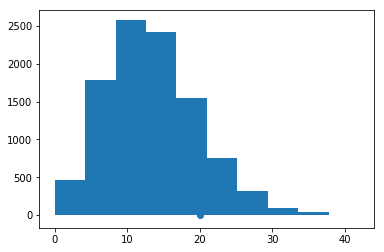

In [29]:
plt.hist(ts)
plt.scatter(sum_abs_diff_Hn,0)
plt.show()

In [30]:
np.mean(ts>=20)

0.1849

In [31]:
# I think this code is good, but better check it ...
ts=[]
for _ in np.arange(1000):
    rs=stats.multinomial.rvs(100,[0.25,0.25,0.25,0.25],size=1)
    ts=np.append(ts,sum(abs(sum(rs)-25)))
np.mean(ts)

13.574

Step 4: Conclude

##### Insufficient evidence to reject the null hypothesis.

What kind of error could we have made in this case? 

##### It is possible that a Type II error was made. (Failed to reject Hn although it is false in actuality.)

#### Power 
Suppose that, in truth, 30% of the balls found in the water were brand A, 30% were brand B, 20% were brand C and 20% were brand D. In this case, our collected sample reflected this truth perfectly. However, our hypothesis test failed to recognize this deviation from equal proportions. We made a type II error. This is because this test has fairly low power. Use simulation to determine the power of this test. 

I am looking for the probability that I reject the null hypothesis given the true proportions laid out above. Well, first I need to figure out for what values of my test statistic I would reject $H_0$. 

In [52]:
#won't give you the exact answer (rounds up)
percentile(95,ts)
np.mean(ts>=24) #still above 0.05, so add/subtract one from 24 until you get a number which yields 0.05 mean
print(np.mean(ts>=25))
critical_value = 25
print("critical_value is 25")

0.3416
critical_value is 25


Next, I need to simulate from the true population and determine how often my test statistic would have met this threshold. 

In [45]:
ts_power = np.sum(abs(stats.multinomial.rvs(100,[0.3,0.3,0.2,0.2],size=10000)-25),axis=1)
ts

array([22, 22, 22, ..., 10, 18, 20])

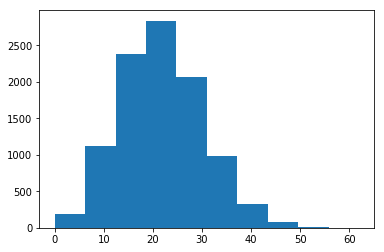

In [46]:
plt.hist(ts_power)
plt.show()

What do you think about this power? 

In [47]:
np.mean(ts_power>=25)

0.3476

##### This isn't good. This means that we would fail to reject the null hypothesis when it is false approximately 35% of the time. The "true" scenario is very similar to Hn (0.25 for each type). So it kind of makes sense that it would be difficult to tell when the null is false. (On a different note, it's difficult to tell which type of error would be worse.)

Repeat this power calculation, but assume Joe collects 500 balls instead of 100. Note that you will have to obtain a new critical value. What does this tell you about power and sample size?

In [53]:
ts_200 = np.sum(abs(stats.multinomial.rvs(200,[0.25,0.25,0.25,0.25],size=10000)-50),axis=1)

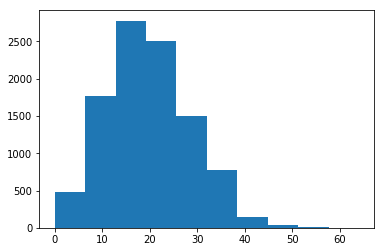

In [54]:
plt.hist(ts_200)
plt.show()

In [59]:
print(np.mean(ts_200>=35))
print("35 is the critical value, for any value = 35 or greater we will reject Hn.")

0.0457
35 is the critical value, for any value = 35 or greater we will reject Hn.


In [62]:
ts_200_power =np.sum(abs(stats.multinomial.rvs(200,[0.3,0.3,0.2,0.2],size=10000)-50),axis=1)
ts_200_power

array([30, 42, 44, ..., 46, 48, 36])

In [64]:
np.mean(ts_200_power>=35)
#This means, that now that you collect 200 golf balls instead of only 200, the power increases, meaning you have a better chance
#of detecting the difference (if one exists). This is good, you want a high power and a small beta.

0.6808